# Datacamp Project: Anime TV-Shows Dataset 2023
__Fiona Hak<sup>1</sup>, Elora Vigo<sup>1</sup>, Céline Guo<sup>1</sup>, Shun Robert<sup>1</sup> et  Julien Giovanazzi<sup>2</sup>__
<br>
<sup>1. M2 AMI2B<br>2. M2 Agro</sup>

## Table of contents
* [Introduction](#introduction)
* [Requirements](#requirements)
* [The dataset](#dataset)
* [Data exploration](#exploration)
* [Base model](#base_model)
* [Submitting on RAMP](#submitting)

### Introduction <a class="anchor" id="introduction"></a>
The provided dataset comprises details about various anime series, encompassing information such as titles, episode counts release date ranges, member counts, and user scores. It represents a curated compilation of popular anime series as of its creation, totaling 4700 entries. The columns include Name (the anime title), Episodes (total number of episodes), Release (date range of release), Members (number of MyAnimeList users who added the anime), and Score (user-assigned score). These data were scraped from MyAnimeList, a renowned anime and manga database, for which credit is duly acknowledged. 

The issue raised was whether we'd be able to predict anime scores based on various quantitative variables, such as the number of episodes or the number of times they've been selected by users.

### Requirements <a class="anchor" id="requirements"></a>

In [1]:
import subprocess
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### The dataset <a class="anchor" id="dataset"></a>

The dataset is structured in the form of a table with five columns. Each row represents an anime series along with its characteristics. The first column, "Name," contains the title of the anime. The second column, "Episodes," indicates the total number of episodes in the series. The third column, "Release," presents the release date range of the anime. The fourth column, "Members," provides the number of MyAnimeList users who have added the anime to their list. Finally, the fifth column, "Score," displays the user-assigned score for the anime. Each row in the dataset represents a distinct entry for a specific anime series, along with its associated details.

The data was uploaded [here](https://www.kaggle.com/datasets/forgetabhi/anime-tv-shows-dataset-2023/data) after creating an account. The original file is available in the data/original_data/ folder.

The train and test data were randomly split into 80/20% proportions with the command :

In [2]:
subprocess.run('head -n 1 data/original_data/anime_data.csv > data/train.csv && head -n 1 data/original_data/anime_data.csv > data/test.csv && shuf data/original_data/anime_data.csv | split -d -l $(($(wc -l < data/original_data/anime_data.csv)*80/100)) - && cat x00 >> data/train.csv && cat x01 >> data/test.csv && rm x00 x01', shell=True)

CompletedProcess(args='head -n 1 data/original_data/anime_data.csv > data/train.csv && head -n 1 data/original_data/anime_data.csv > data/test.csv && shuf data/original_data/anime_data.csv | split -d -l $(($(wc -l < data/original_data/anime_data.csv)*80/100)) - && cat x00 >> data/train.csv && cat x01 >> data/test.csv && rm x00 x01', returncode=0)

### Data exploration <a class="anchor" id="exploration"></a>
First, let's visualize the data.

In [3]:
data_df = pd.read_csv('data/original_data/anime_data.csv')

In [4]:
train_df = pd.read_csv('data/train.csv')
train_df

,Unnamed: 0,Name,Episodes,Release,Members,Score
0,2625.0,Uta∽Kata,12,Oct 2004 - Dec 2004,25685,6.73
1,824.0,World Trigger,73,Oct 2014 - Apr 2016,414665,7.58
2,3202.0,White Album,13,Jan 2009 - Mar 2009,121074,6.49
3,657.0,Uramichi Oniisan,13,Jul 2021 - Sep 2021,226475,7.7
4,1062.0,"Kumo desu ga, Nani ka?",24,Jan 2021 - Jul 2021,426467,7.45
...,...,...,...,...,...,...
3755,777.0,Mahoujin Guruguru,45,Oct 1994 - Sep 1995,10959,7.61
3756,4277.0,Saredo Tsumibito wa Ryuu to Odoru,12,Apr 2018 - Jun 2018,54146,5.78
3757,946.0,Baka to Test to Shoukanjuu,13,Jan 2010 - Apr 2010,632083,7.51
3758,522.0,Hidamari Sketch x 365,13,Jul 2008 - Sep 2008,32065,7.83


In [5]:
test_df = pd.read_csv('data/test.csv')
test_df

,Unnamed: 0,Name,Episodes,Release,Members,Score
0,4195,Tsuruhime Ja!,49.0,Jan 1990 - Dec 1990,592,5.84
1,1715,Mouryou no Hako,13.0,Oct 2008 - Dec 2008,62088,7.16
2,1191,Kemono Jihen,12.0,Jan 2021 - Mar 2021,368111,7.38
3,2209,Monochrome Factor,24.0,Apr 2008 - Sep 2008,59643,6.94
4,4371,Duel Masters VS,49.0,Apr 2014 - Mar 2015,1263,5.66
...,...,...,...,...,...,...
936,3330,Shining Star,52.0,Oct 2017 - Dec 2018,1027,6.43
937,3784,Mori no Tonto-tachi,23.0,Oct 1984 - Mar 1985,860,6.17
938,588,Love Live! School Idol Project 2nd Season,13.0,Apr 2014 - Jun 2014,256966,7.76
939,3378,Tejina-senpai,12.0,Jul 2019 - Sep 2019,273767,6.40


Here are some summaries of the nature and distribution of the data:

In [6]:
print(train_df.info()) ; print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3759 non-null   float64
 1   Name        3760 non-null   object 
 2   Episodes    3735 non-null   object 
 3   Release     3760 non-null   object 
 4   Members     3760 non-null   object 
 5   Score       3753 non-null   object 
dtypes: float64(1), object(5)
memory usage: 176.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  941 non-null    int64  
 1   Name        941 non-null    object 
 2   Episodes    933 non-null    float64
 3   Release     941 non-null    object 
 4   Members     941 non-null    int64  
 5   Score       940 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 44.2+ KB
None


We can see that there are 3760 rows in the train dataframe and 941 in test. There are non-zero values in the important episodes and score columns in both cases. The unnamed column corresponds to the ranking count of the various animes in the original file and is of no interest to us here. Some columns of interest, including episodes, members and score, are of object type and will have to be converted back to float and int for analysis purposes, and missing data indexed as NaN.

In [7]:
#convert to numeric
num_scores = pd.to_numeric(train_df['Score'], errors='coerce')
num_episodes = pd.to_numeric(train_df['Episodes'], errors='coerce')
num_members = pd.to_numeric(train_df['Members'], errors='coerce')

#replace nan
train_df.replace('', pd.NA, inplace=True)

The target variable is in the column Score since we classify the animes' popularity.

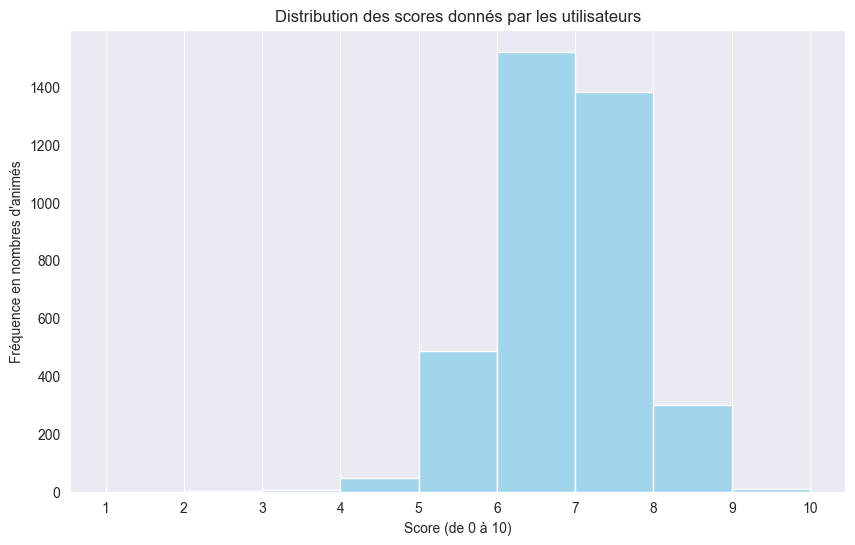

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(num_scores.dropna(), bins=range(1, 11), kde=False, color='skyblue')
plt.title('Distribution des scores donnés par les utilisateurs') ; plt.xlabel('Score (de 0 à 10)') ; plt.ylabel('Fréquence en nombres d\'animés')
plt.xticks(range(1, 11))
plt.grid(axis='y')
plt.show()

The distribution of scores is fairly unbalanced, peaking at around 7.

Finally, we have plotted the relationships between the main variables and the score:

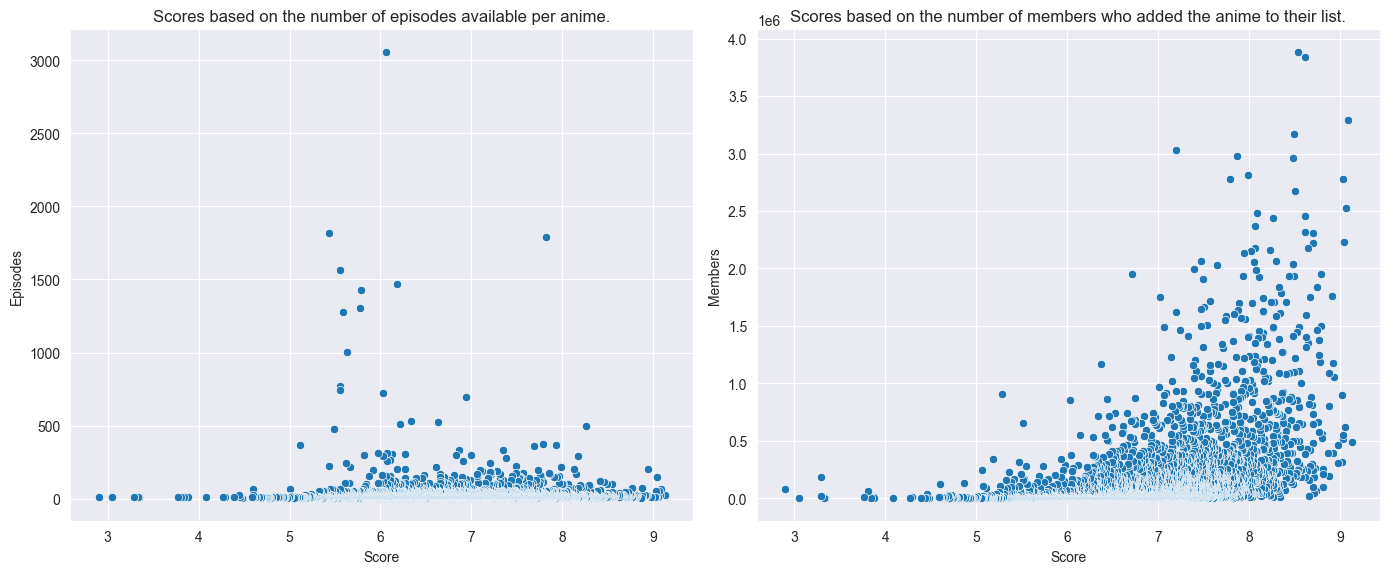

In [9]:
#display fig on same line
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#for episodes
sns.scatterplot(x='Score', y='Episodes', data=data_df, ax=axes[0])
axes[0].set_title('Scores based on the number of episodes available per anime.')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Episodes')

#for members
sns.scatterplot(x='Score', y='Members', data=data_df, ax=axes[1])
axes[1].set_title('Scores based on the number of members who added the anime to their list.')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Members')

#display all
plt.tight_layout()
plt.show()

We can see that the more members have added the anime to their lists, the higher its score. On the other hand, the number of episodes seems to explain the score less.

### Base model <a class="anchor" id="base_model"></a>

<b>1. problem.py</b><br>

We decide to consider that we have 10 classes to classify the data. We round down the scores to make it easier to classify the anime using their scores. The result is a data set with unbalanced classes (with more observations around 7) as it can be seen on the histogram above.

We only keep numerical data (number of episodes, members in addition to the target). There are some missing data in episodes. Those lines are dropped.

In [10]:
#the columns to process
col = ["Members", "Score", "Episodes"]
data_sel = train_df[col].copy()

#drop episodes and members with NA
data_sel["Episodes"] = pd.to_numeric(data_sel["Episodes"], errors="coerce")
data_sel = data_sel.dropna(subset=["Episodes"]).copy()
data_sel["Members"] = pd.to_numeric(data_sel["Members"], errors="coerce")
data_sel = data_sel.dropna(subset=["Members"]).copy()

#target: take the floor of the score to get categories
data_sel["Score"] = pd.to_numeric(data_sel["Score"], errors="coerce").apply(np.floor)
med = data_sel["Score"].median()
data_sel["Score"].fillna(med, inplace=True)

X = data_sel.drop(columns=["Score"]).to_numpy()
y = data_sel["Score"].values

In [11]:
X

array([[2.56850e+04, 1.20000e+01],
       [4.14665e+05, 7.30000e+01],
       [1.21074e+05, 1.30000e+01],
       ...,
       [6.32083e+05, 1.30000e+01],
       [3.20650e+04, 1.30000e+01],
       [2.52350e+04, 2.60000e+01]])

In [12]:
y

array([6., 7., 6., ..., 7., 7., 6.])

<b>2. classifier.py</b><br>

### Submitting on RAMP <a class="anchor" id="submitting"></a>

In [13]:
!ramp-test --submission starting_kit

Testing Anime TV-Shows classification
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  bal_acc    acc      time
	train    0.828  0.553  0.705338
	valid    0.455  0.432  0.072046
	test     0.316  0.437  0.025437
CV fold 1
	score  bal_acc    acc      time
	train    0.819  0.544  0.742073
	valid    0.431  0.477  0.057036
	test     0.306  0.473  0.016942
----------------------------
Mean CV scores
----------------------------
	score         bal_acc             acc        time
	train  0.824 ± 0.0043  0.548 ± 0.0045  0.7 ± 0.02
	valid  0.443 ± 0.0121  0.454 ± 0.0221  0.1 ± 0.01
	test    0.311 ± 0.005  0.455 ± 0.0177   0.0 ± 0.0
----------------------------
Bagged scores
----------------------------
	score  bal_acc    acc
	valid    0.412  0.456
	test     0.320  0.460
